In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from mlxtend.plotting import plot_decision_regions

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [8]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [9]:
df_sex = pd.get_dummies(df['Sex'], drop_first=True)
df_sex.columns = ['Sex_I', 'Sex_M']

In [10]:
df_sex.head()

,Sex_I,Sex_M
0,False,True
1,False,True
2,False,False
3,False,True
4,True,False


In [11]:
df_sex = df_sex.astype(int)

In [12]:
df_sex.head()

,Sex_I,Sex_M
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0


In [13]:
df.drop(columns=['Sex'], inplace=True)

In [14]:
df = pd.concat([df, df_sex], axis=1)

In [15]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


<Axes: ylabel='Rings'>

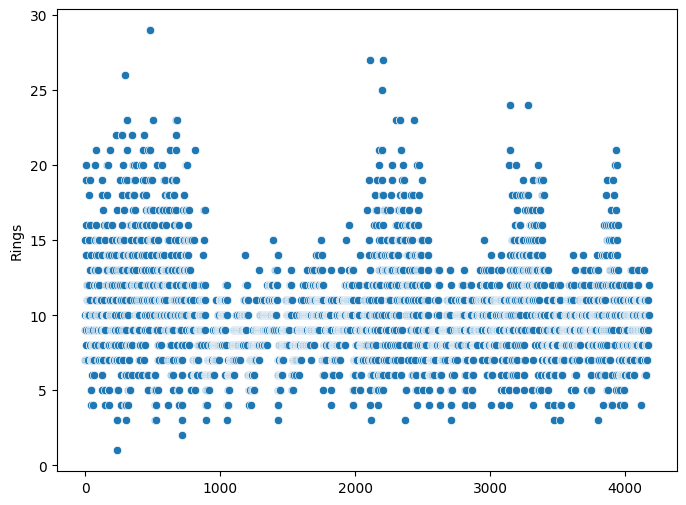

In [16]:
plt.figure(figsize = (8,6))
sns.scatterplot(df['Rings'])

In [17]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')

In [18]:
y = df['Rings']
X = df.drop(columns=['Rings'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 9), (836, 9), (3341,), (836,))

In [21]:
knn_reg = KNeighborsRegressor(n_neighbors=30)

In [22]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=30)

In [23]:
y_pred = knn_reg.predict(X_test)

In [24]:
mean_squared_error(y_test, y_pred)

np.float64(4.865536948431685)

In [25]:
r2_score(y_test, y_pred)

0.5505364858552193

In [26]:
gs = GridSearchCV(estimator = KNeighborsRegressor(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=5)

gs.fit(X_train, y_train)

gs.cv_results_

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'mean_fit_time': array([0.00097003, 0.00080757, 0.00079055, 0.00073919, 0.00073481,
        0.00075727, 0.00075083, 0.00075369, 0.00075402, 0.00075512,
        0.00075183, 0.00075316, 0.00075569, 0.00075178, 0.00075135,
        0.00074716, 0.00075316, 0.00075254, 0.00075502, 0.00075483,
        0.00075545, 0.0007566 , 0.00075212, 0.00075488, 0.00075622,
        0.00075245, 0.00075607, 0.00075393, 0.00075617, 0.00075064,
        0.0007555 , 0.00075269, 0.00075645, 0.00075707, 0.00076075,
        0.00075607, 0.00075903, 0.00075707, 0.00076036, 0.0007544 ,
        0.00075803, 0.00075922, 0.00076427, 0.00075765, 0.0007668 ,
        0.00076089, 0.00076547, 0.00076065, 0.0007658 , 0.00076842,
        0.00077195, 0.00076103, 0.00076809, 0.00076427, 0.0007658 ,
        0.00076327, 0.00077071, 0.00076418, 0.00076642, 0.00076723,
        0.00076942, 0.00076499, 0.00076776, 0.00076122, 0.00077162,
        0.00076652, 0.00076904, 0.00076256, 0.00077062, 0.00076876,
        0.00077224, 0.00076661,

In [27]:
gs.best_score_

np.float64(0.5350054367191776)

In [28]:
gs.best_params_

{'n_neighbors': 17, 'p': 2, 'weights': 'distance'}

In [29]:
y_pred1 = gs.predict(X_test)

In [30]:
r2_score(y_test, y_pred1)

0.552091703004832